In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import joblib
import warnings
warnings.filterwarnings('ignore')

In [5]:
data = pd.read_csv('Crop_recommendation.csv')
print(data.head())

    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice


In [6]:
print("\nDataset Info:")
print(data.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
None


In [7]:
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


In [8]:
print("\nCrop Distribution:")
print(data['label'].value_counts())


Crop Distribution:
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64


In [11]:
X = data.drop('label', axis=1)
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Model Accuracy: 0.9931818181818182

Classification Report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.0

In [13]:
joblib.dump(model, 'crop_recommendation_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
print("Model and scaler saved successfully!")

Model and scaler saved successfully!


In [14]:
def recommend_crop(N, P, K, temperature, humidity, ph, rainfall):

    model = joblib.load('crop_recommendation_model.pkl')
    scaler = joblib.load('scaler.pkl')

    input_data = np.array([[N, P, K, temperature, humidity, ph, rainfall]])

    scaled_input = scaler.transform(input_data)

    prediction = model.predict(scaled_input)

    return prediction[0]

In [15]:
N = 90
P = 42
K = 43
temperature = 20.87
humidity = 82.00
ph = 6.50
rainfall = 202.93

recommended_crop = recommend_crop(N, P, K, temperature, humidity, ph, rainfall)
print(f"Recommended Crop: {recommended_crop}")

Recommended Crop: rice


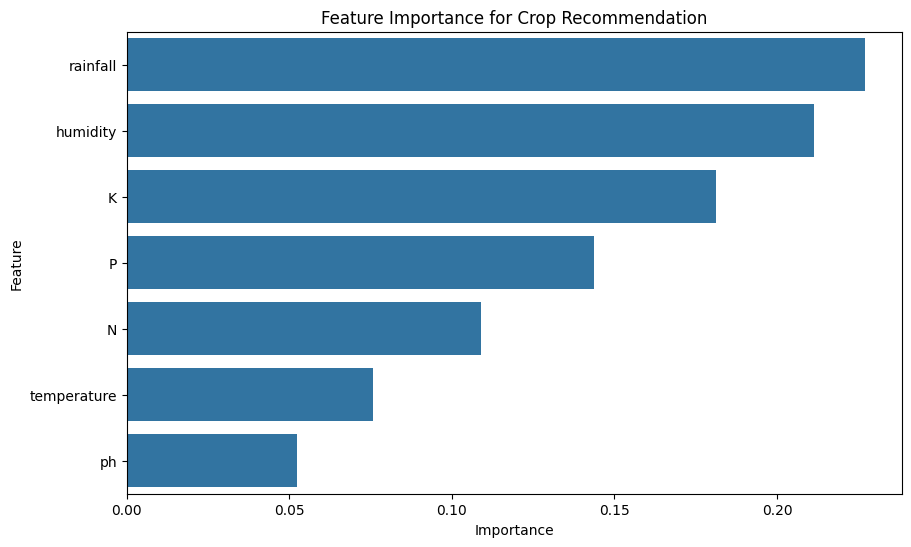

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_importance = model.feature_importances_
features = X.columns

importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
importance_df = importance_df.sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance for Crop Recommendation')
plt.show()

In [20]:
def user_interface():
    print("Crop Recommendation System")
    print("--------------------------")
    
    try:
        N = float(input("Enter Nitrogen content (0-140): "))
        P = float(input("Enter Phosphorous content (5-145): "))
        K = float(input("Enter Potassium content (5-205): "))
        temperature = float(input("Enter Temperature in Celsius (8-44): "))
        humidity = float(input("Enter Humidity in % (14-99): "))
        ph = float(input("Enter Soil pH (3-9): "))
        rainfall = float(input("Enter Rainfall in mm (20-300): "))
        
        recommended_crop = recommend_crop(N, P, K, temperature, humidity, ph, rainfall)
        print(f"\nRecommended Crop: {recommended_crop}")
        
    except ValueError:
        print("Please enter valid numerical values.")

In [21]:
user_interface()

Crop Recommendation System
--------------------------

Recommended Crop: pigeonpeas
